# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [27]:
batch_size = 200

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

dataset_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
print(dataset_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [28]:
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)


In [29]:
len(loader_train)

300

In [30]:

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de treinamento: 300

Dimensões dos dados de um minibatch: torch.Size([200, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [31]:
print('Número de minibatches de treinamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de treinamento: 300


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [32]:
model = torch.nn.Linear(28*28, 10)

In [33]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.2874, -1.0011, -0.2965, -0.7280,  0.1770,  0.6767, -0.1581,  0.2117,
          1.1539,  0.2389]], grad_fn=<AddmmBackward0>)

In [34]:
x, _ = dataset_train[0]
x = x.view(-1, 28 * 28)
predict = model(x)
predict

tensor([[ 0.2127, -0.1985,  0.1756, -0.2028,  0.1594,  0.2884, -0.0431, -0.1231,
          0.1540, -0.0432]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [35]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [36]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for y, data in enumerate(loader_train):
        (x_train, y_train) = data
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))

        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print (f'Época {i+1}/{n_epochs}, batch: {y+1}/{len(loader_train)}, perda: {loss.data}')

Época 1/5, batch: 1/300, perda: 2.3440680503845215
Época 1/5, batch: 2/300, perda: 2.0176267623901367
Época 1/5, batch: 3/300, perda: 1.7155778408050537
Época 1/5, batch: 4/300, perda: 1.6021857261657715
Época 1/5, batch: 5/300, perda: 1.2752063274383545
Época 1/5, batch: 6/300, perda: 1.1184108257293701
Época 1/5, batch: 7/300, perda: 1.1112316846847534
Época 1/5, batch: 8/300, perda: 0.9675273299217224
Época 1/5, batch: 9/300, perda: 0.922264575958252
Época 1/5, batch: 10/300, perda: 0.8459367156028748
Época 1/5, batch: 11/300, perda: 0.9364783763885498
Época 1/5, batch: 12/300, perda: 0.8989975452423096
Época 1/5, batch: 13/300, perda: 0.7952765822410583
Época 1/5, batch: 14/300, perda: 0.8951108455657959
Época 1/5, batch: 15/300, perda: 0.7465571761131287
Época 1/5, batch: 16/300, perda: 0.7047960162162781
Época 1/5, batch: 17/300, perda: 0.6222370266914368
Época 1/5, batch: 18/300, perda: 0.6731752753257751
Época 1/5, batch: 19/300, perda: 0.729964017868042
Época 1/5, batch: 20/30

In [37]:
print('Final loss:', loss.data)

Final loss: tensor(0.2619)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

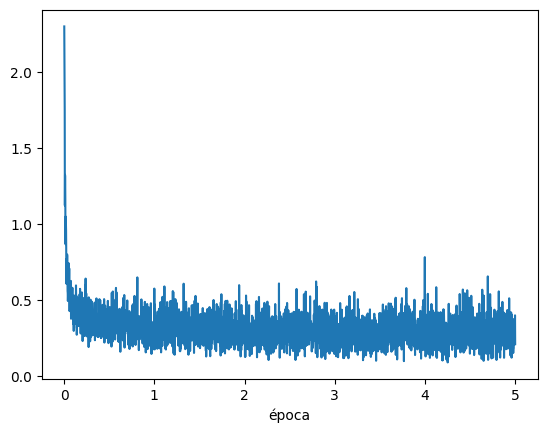

In [15]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

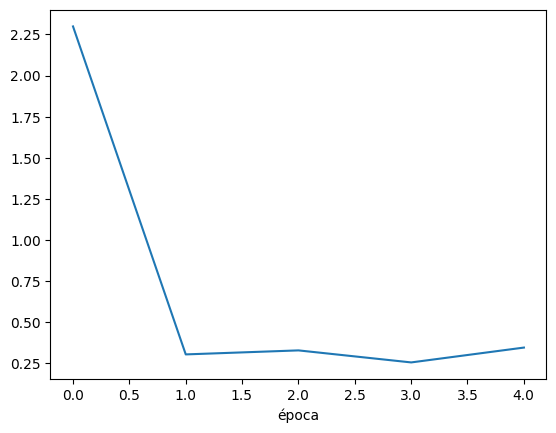

In [16]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
R.: 100
2. Em uma época, quantos mini-batches existem?
R.: 600
3. Qual é a definição de época?
R.: Um ciclo, loop, onde todas as amostras da base de dados são avaliadas pelo modelo, seja diretamente ou em mini-batches. E após o cálculo da perda, os pesos da rede são atualizados.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no estilo [Época: 1/4, batch: 600]<br>
R.: Inserimos o código necessário no laço de treinamento

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

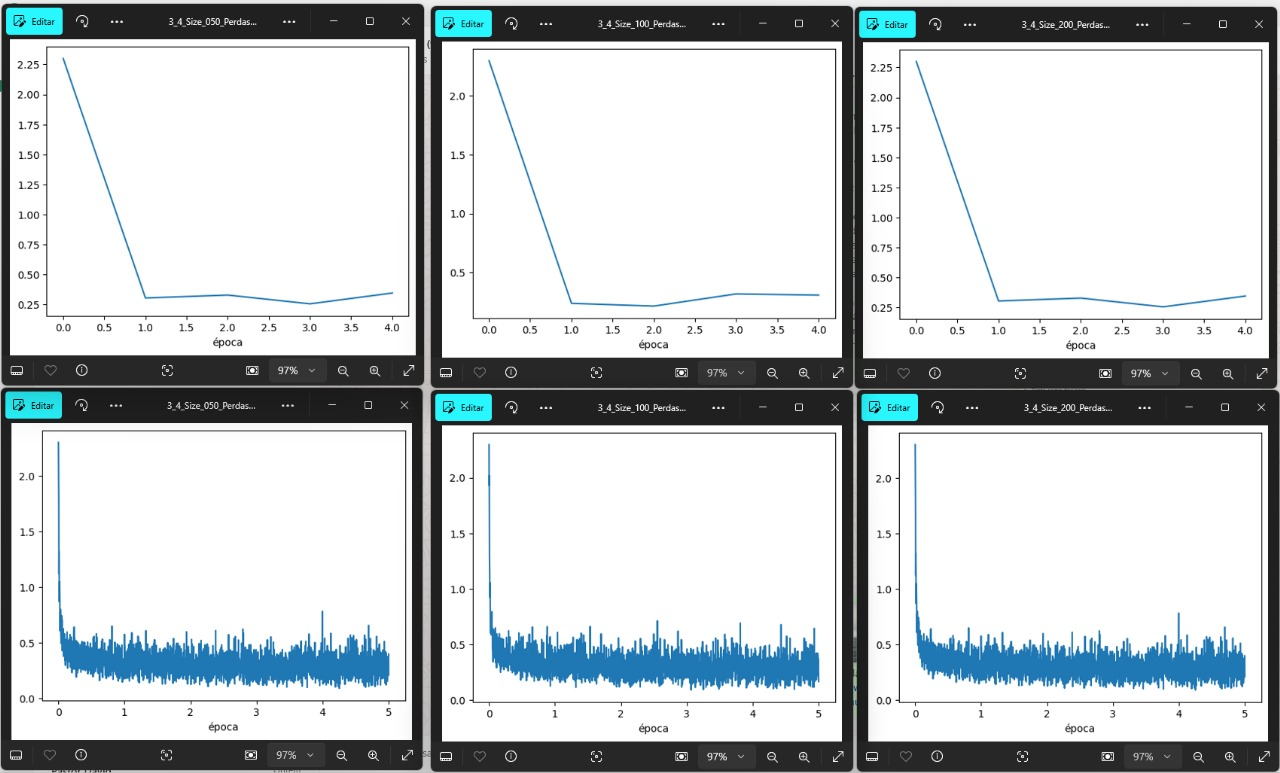

## Conclusões sobre os experimentos deste notebook
